In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import export_graphviz

import graphviz

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import matplotlib

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from statsmodels.api import Logit

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


# 의사결정나무

# 데이터구성

In [4]:
df = pd.read_csv("유방암.csv", engine='python')
df

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [7]:
df_y = df['diagnosis']
df_x = df.drop('diagnosis', axis=1, inplace=False)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, train_size =0.4, random_state=1234)
df_valid_x, df_test_x, df_valid_y, df_test_y = train_test_split(df_test_x, df_test_y, train_size =0.5, random_state=1234)

print("train data X size : ", df_train_x.shape)
print("train data Y size : ", df_train_y.shape)
print("valid data X size : ", df_valid_x.shape)
print("valid data Y size : ", df_valid_y.shape)
print("test data X size : " ,df_test_x.shape)
print("test data Y size : " ,df_test_x.shape)

train data X size :  (227, 30)
train data Y size :  (227,)
valid data X size :  (171, 30)
valid data Y size :  (171,)
test data X size :  (171, 30)
test data Y size :  (171, 30)


# step 2 모델 생성

# 모델 parameter 조정

In [10]:
train_accuracy = []
valid_accuracy = []
para_depth = [depth for depth in range(1,11)]
for v_max_depth in para_depth:
    tree = DecisionTreeClassifier(random_state=1234, max_depth=v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    valid_accuracy.append(tree.score(df_valid_x, df_valid_y))

    
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainScore"] = train_accuracy
df_accuracy_depth["TestScore"] = valid_accuracy
df_accuracy_depth.round(3)


,Depth,TrainScore,TestScore
0,1,0.943,0.895
1,2,0.965,0.930
2,3,0.987,0.942
3,4,1.000,0.895
4,5,1.000,0.895
5,6,1.000,0.895
6,7,1.000,0.895
7,8,1.000,0.895
8,9,1.000,0.895
9,10,1.000,0.895


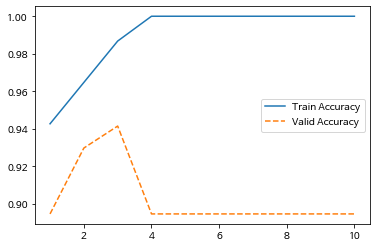

In [12]:
plt.plot(para_depth, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_depth, valid_accuracy, linestyle="--", label= "Valid Accuracy")
plt.legend()

In [23]:
train_accuracy = []
valid_accuracy = []
para_split = [n_split * 2 for n_split in range(2,20)]
for v_min_samples_split in para_split:
    tree = DecisionTreeClassifier(random_state=1234, max_depth = 3, min_samples_split=v_min_samples_split)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    valid_accuracy.append(tree.score(df_valid_x, df_valid_y))
    
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainScore"] = train_accuracy
df_accuracy_split["TestScore"] = valid_accuracy
df_accuracy_split.round(3)


,MinSamplesSplit,TrainScore,TestScore
0,4,0.987,0.942
1,6,0.987,0.942
2,8,0.987,0.942
3,10,0.965,0.930
4,12,0.965,0.930
5,14,0.965,0.930
6,16,0.965,0.930
7,18,0.965,0.930
8,20,0.965,0.930
9,22,0.965,0.930


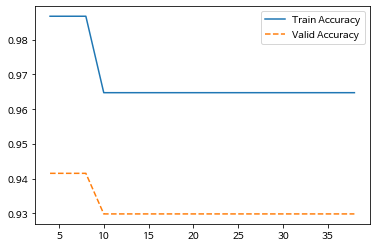

In [26]:
plt.plot(para_split, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_split, valid_accuracy, linestyle="--", label= "Valid Accuracy")
plt.legend()

In [28]:
train_accuracy = []
valid_accuracy = []
para_leaf = [n_leaf * 2 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeClassifier(random_state=1234, min_samples_leaf=v_min_samples_leaf, min_samples_split=8, 
                                max_depth=3)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    valid_accuracy.append(tree.score(df_valid_x, df_valid_y))
    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainScore"] = train_accuracy
df_accuracy_leaf["ValidScore"] = valid_accuracy

df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainScore,ValidScore
0,2,0.987,0.942
1,4,0.978,0.942
2,6,0.965,0.930
3,8,0.965,0.930
4,10,0.952,0.906
5,12,0.943,0.912
6,14,0.943,0.895
7,16,0.943,0.895
8,18,0.943,0.895
9,20,0.943,0.895


# 최종모델평가

In [29]:
tree_final = DecisionTreeClassifier(random_state=1234, min_samples_leaf=4, min_samples_split=8, max_depth=3)
tree_final.fit(df_train_x, df_train_y)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1234, splitter='best')

In [31]:
y_pred = tree_final.predict(df_test_x)
print("Accuracy :", tree_final.score(df_test_x, df_test_y))
print("Confusion matrix:\n", confusion_matrix(df_test_y, y_pred))

Accuracy : 0.8888888888888888
Confusion matrix:
 [[93  9]
 [10 59]]


In [33]:
df_importance = pd.DataFrame()
df_importance['Feature'] = df_x.columns
df_importance['Importance'] = tree_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
7,mean concave points,0.823
22,worst perimeter,0.081
13,area error,0.049
21,worst texture,0.037
2,mean perimeter,0.010
0,mean radius,0.000
17,concave points error,0.000
28,worst symmetry,0.000
27,worst concave points,0.000
26,worst concavity,0.000


Text(0, 0.5, '변수')

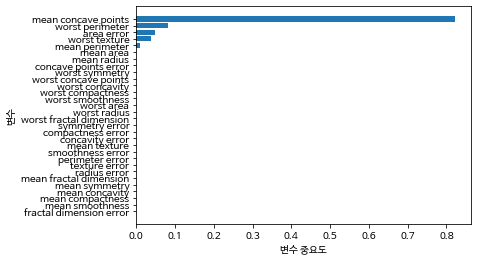

In [34]:
df_importance.sort_values("Importance", ascending = True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

# 랜덤포레스트

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import export_graphviz

import graphviz

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import matplotlib

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from statsmodels.api import Logit

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


# 데이터구성

In [45]:
df = pd.read_csv("유방암.csv", engine='python')
df

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [46]:
df_y = df['diagnosis']
df_x = df.drop('diagnosis', axis=1, inplace=False)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, train_size =0.4, random_state=1234)
df_valid_x, df_test_x, df_valid_y, df_test_y = train_test_split(df_test_x, df_test_y, train_size =0.5, random_state=1234)

print("train data X size : ", df_train_x.shape)
print("train data Y size : ", df_train_y.shape)
print("valid data X size : ", df_valid_x.shape)
print("valid data Y size : ", df_valid_y.shape)
print("test data X size : " ,df_test_x.shape)
print("test data Y size : " ,df_test_x.shape)

train data X size :  (227, 30)
train data Y size :  (227,)
valid data X size :  (171, 30)
valid data Y size :  (171,)
test data X size :  (171, 30)
test data Y size :  (171, 30)


In [47]:
# step 2 모델 생성

In [48]:
# 모델 parameter 조정

In [56]:
train_accuracy = []
valid_accuracy = []
para_n_tree = [n_tree * 5 for n_tree in range(1,11)]
for v_n_estimators in para_n_tree:
    rf = RandomForestClassifier(random_state=1234, n_estimators=v_n_estimators)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    valid_accuracy.append(tree.score(df_valid_x, df_valid_y))

    
df_accuracy_tree = pd.DataFrame()
df_accuracy_tree["n_estimators"] = para_n_tree
df_accuracy_tree["TrainScore"] = train_accuracy
df_accuracy_tree["ValidScore"] = valid_accuracy
df_accuracy_tree.round(3)


,n_estimators,TrainScore,ValidScore
0,5,0.943,0.895
1,10,0.943,0.895
2,15,0.943,0.895
3,20,0.943,0.895
4,25,0.943,0.895
5,30,0.943,0.895
6,35,0.943,0.895
7,40,0.943,0.895
8,45,0.943,0.895
9,50,0.943,0.895


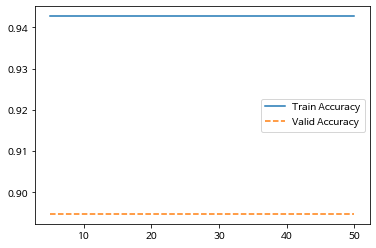

In [54]:
plt.plot(para_n_tree, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_n_tree, valid_accuracy, linestyle="--", label= "Valid Accuracy")
plt.legend()